In [232]:
import pandas as pd
import pickle
import numpy as np

In [233]:
with open("data/stones_map/team0_202312091806.pickle", mode="rb") as f:
    team0map = pickle.load(f)

with open("data/stones_map/team1_202312091806.pickle", mode="rb") as f:
    team1map = pickle.load(f)


In [234]:
team0map

[     team angle     x     y
 0   team0  None  None  None
 1   team0  None  None  None
 2   team0  None  None  None
 3   team0  None  None  None
 4   team0  None  None  None
 5   team0  None  None  None
 6   team0  None  None  None
 7   team0  None  None  None
 8   team1  None  None  None
 9   team1  None  None  None
 10  team1  None  None  None
 11  team1  None  None  None
 12  team1  None  None  None
 13  team1  None  None  None
 14  team1  None  None  None
 15  team1  None  None  None,
      team      angle         x          y
 0   team0 -37.990211  2.109598  38.150963
 1   team0        NaN       NaN        NaN
 2   team0        NaN       NaN        NaN
 3   team0        NaN       NaN        NaN
 4   team0        NaN       NaN        NaN
 5   team0        NaN       NaN        NaN
 6   team0        NaN       NaN        NaN
 7   team0        NaN       NaN        NaN
 8   team1        NaN       NaN        NaN
 9   team1        NaN       NaN        NaN
 10  team1        NaN       NaN  

In [235]:
MAPSIZE_X = 2.4 # 中心から端までの距離の絶対値(m)
MAPSIZE_Y = 43.8 # 投擲地点から上端までの距離の絶対値(m)

In [236]:
N = 50

def matrix(x, y) -> tuple:
    numx = N*(MAPSIZE_X+x)/(2*MAPSIZE_X)
    numy = N*y/MAPSIZE_Y
    return (numx, numy)

In [237]:
map_no = 9

x0s = team0map[map_no]["x"].values
y0s = team0map[map_no]["y"].values
team0 = team0map[map_no]["team"].values

x1s = team1map[map_no]["x"].values
y1s = team1map[map_no]["y"].values
team1 = team1map[map_no]["team"].values

team0map[map_no]

,team,angle,x,y
0,team0,NaN,NaN,NaN
1,team0,NaN,NaN,NaN
2,team0,NaN,NaN,NaN
3,team0,NaN,NaN,NaN
4,team0,-32.156345,1.929912,36.066841
5,team0,NaN,NaN,NaN
6,team0,NaN,NaN,NaN
7,team0,NaN,NaN,NaN
8,team1,-35.862408,1.767911,38.610058
9,team1,-35.661545,1.803442,38.044243


In [238]:
mat = np.zeros((N, N))
for x, y, team in zip(x0s, y0s, team0map):
    num = matrix(x, y)
    if np.isnan(x):
        pass
    else:
        if team is "team0":
            mat[int(num[0]), int(num[1])] = 100 # stone value
        else:
            mat[int(num[0]), int(num[1])] = 500 # stone value

"""
for x, y in zip(x1s, y1s):
    num = matrix(x, y)
    if np.isnan(x):
        pass
    else:
        mat[int(num[0]), int(num[1])] = 50 # stone value
"""        

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_6119/3436754607.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if team is "team0":


'\nfor x, y in zip(x1s, y1s):\n    num = matrix(x, y)\n    if np.isnan(x):\n        pass\n    else:\n        mat[int(num[0]), int(num[1])] = 50 # stone value\n'

In [239]:
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

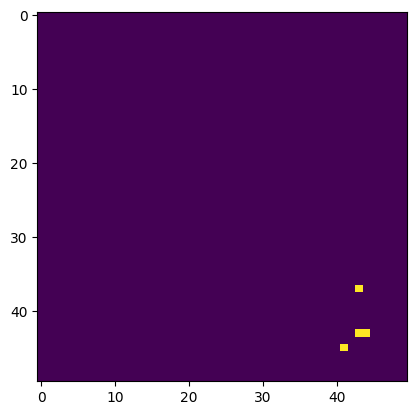

In [240]:
import matplotlib.pyplot as plt

plt.imshow(mat)
plt.show()